## Let's take a look at who was the unluckiest player in the 2020 Buttmuncher Regular Season

In [74]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Control Variables
data_root = r"C:\Users\hmand\OneDrive\Documents\GitHub\butt-munchers\data"
plots_root = r"C:\Users\hmand\OneDrive\Documents\GitHub\butt-munchers\plots"
managers = ["Eric W", "Hank M", "Evan Culbert", "Dylan Hochstetler", "Sam Bunz", "Dirk Opland", "Zach Crane", "Brad Neese", "Faisal Alabsi", "Matthew Knoedel", "Erik Anderson", "Jacob Blum", "Brian Ross"]
years = ["2015", "2016", "2017", "2018", "2019", "2020"]

In [44]:
games = pd.read_excel(data_root + r"\buttmunchers.xlsx", sheet_name="Buttmuncher Games")
print(games.head)

<bound method NDFrame.head of       Year        Title                        Team Name           Managers  \
0     2015   NFL Week 1  Todd is a Funny Name for a Gurl             Eric W   
1     2015   NFL Week 1            Hingle McCringleberry             Hank M   
2     2015   NFL Week 1             Can I get a BJ Raji?       Evan Culbert   
3     2015   NFL Week 1        Ericky Bobby Shake n Bake      Erik Anderson   
4     2015   NFL Week 1                   Team Voldemort  Dylan Hochstetler   
...    ...          ...                              ...                ...   
1041  2020  NFL Week 13              Scranton Stranglers      Faisal Alabsi   
1042  2020  NFL Week 13              Tyler Boyd Fan Club         Jacob Blum   
1043  2020  NFL Week 13                   Team Voldemort  Dylan Hochstetler   
1044  2020  NFL Week 13                       Zeke Squad         Brad Neese   
1045  2020  NFL Week 13                     Bunz Muncher           Sam Bunz   

       Score Result  

Figure out each week's median score. From there we'll figure out the number of times someone who lost would have beaten the league median. The total number of times this occurs will be the manager's salt score for that year

In [45]:
games_subset = games[["Year","Title","Score"]]
median_scores = games_subset.groupby(by=["Year", "Title"], as_index=False).agg(np.median)
median_scores.to_csv(data_root + r"\median_scores.csv")
print(median_scores.head)

<bound method NDFrame.head of     Year        Title   Score
0   2015   NFL Week 1   92.91
1   2015  NFL Week 10   82.75
2   2015  NFL Week 11   81.11
3   2015  NFL Week 12   84.54
4   2015  NFL Week 13  102.29
..   ...          ...     ...
85  2020   NFL Week 5  101.84
86  2020   NFL Week 6   86.48
87  2020   NFL Week 7   93.92
88  2020   NFL Week 8   86.00
89  2020   NFL Week 9   88.50

[90 rows x 3 columns]>


In [65]:
salt_score_dictionary = {name : 0 for name in managers}
for i, row in games.iterrows() :
    median_score = median_scores["Score"].loc[(median_scores["Year"] == row["Year"]) & (median_scores["Title"] == row["Title"])].values
    if "Playoff" not in row["Title"] :
        if row["Score"] >= median_score and row["Result"] == "L":
            salt_score_dictionary[row["Managers"]] += 1
salt_df = pd.DataFrame.from_dict(salt_score_dictionary, orient="index", columns = ["SaltScore"])
salt_df.sort_values(by="SaltScore",inplace=True, ascending=False)
print(salt_df.head)

<bound method NDFrame.head of                    SaltScore
Dylan Hochstetler         10
Brad Neese                10
Hank M                     9
Jacob Blum                 9
Dirk Opland                8
Zach Crane                 8
Faisal Alabsi              8
Sam Bunz                   7
Brian Ross                 7
Eric W                     6
Evan Culbert               5
Matthew Knoedel            5
Erik Anderson              1>


### The Salt Chart 2020 - Most Games Lost Scoring over League Median
Zach Crane - 3
Matt Knoedel - 3
Dirk Opland - 1
Jacob Blum - 1
Brian Ross - 1
Brad Neese - 1
Hank Mandsager - 1
Eric Welter - 1
Dylan Hochstetler - 1
Evan Culbert - 0
Sam Bunz - 0
Faisal Alabsi - 0

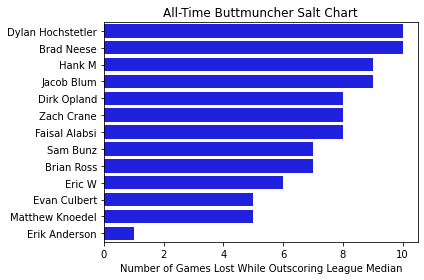

In [86]:
ax = sns.barplot(x="SaltScore", y=salt_df.index, data=salt_df, color="blue")
ax.set_title("All-Time Buttmuncher Salt Chart")
ax.set_xlabel("Number of Games Lost While Outscoring League Median")
plt.tight_layout()
fig = ax.get_figure()
fig.savefig(plots_root + r"\AllTimeSaltChart.png", dpi=200, pad_inches=0.2)

In [84]:
lucky_sob_score_dictionary = {name : 0 for name in managers}
for i, row in games.iterrows() :
    median_score = median_scores["Score"].loc[(median_scores["Year"] == row["Year"]) & (median_scores["Title"] == row["Title"])].values
    if "Playoff" not in row["Title"] :
        if row["Score"] < median_score and row["Result"] == "W":
            lucky_sob_score_dictionary[row["Managers"]] += 1
lucky_sob_df = pd.DataFrame.from_dict(lucky_sob_score_dictionary, orient="index", columns = ["LuckScore"])
lucky_sob_df.sort_values(by="LuckScore",inplace=True, ascending=False)
print(lucky_sob_df.head)

<bound method NDFrame.head of                    LuckScore
Dylan Hochstetler         12
Dirk Opland               11
Brad Neese                11
Eric W                     9
Zach Crane                 8
Hank M                     7
Matthew Knoedel            7
Faisal Alabsi              6
Sam Bunz                   5
Jacob Blum                 5
Brian Ross                 5
Evan Culbert               4
Erik Anderson              3>
